In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (5,3)

In [2]:
# Import data from the raw txt file
raw_names = "JobID,Account,NNodes,Start,End,Elapsed,ElapsedRaw,Timelimit,TimelimitRaw,State"
col_names = raw_names.split(",")
jobs = pd.read_csv("21_28_02_2022_jobs.txt", sep="|", skiprows=3, names=col_names, index_col=0)

In [3]:
# Calculate the runtime (in minutes)
jobs['Runtime'] = jobs['ElapsedRaw']/60
jobs.rename({'TimelimitRaw' : 'Limit'}, axis=1, inplace=True)

In [4]:
# Calculate the slacks
jobs['Slack'] = jobs['Limit'] - jobs['Runtime']
jobs['Slack'].describe()

count    73977.000000
mean       820.110340
std       1744.196487
min        -10.266667
25%         38.600000
50%         59.700000
75%        668.650000
max      20149.183333
Name: Slack, dtype: float64

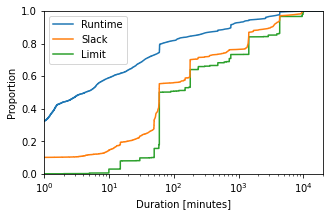

In [5]:
# Print the CDF plot
sns.ecdfplot(data=jobs.loc[:, ['Runtime', 'Slack', 'Limit']], hue_order=['Runtime', 'Slack', 'Limit',])
plt.xlim((1, jobs['Runtime'].max()))
plt.xscale('log')
plt.xlabel('Duration [minutes]')

plt.savefig('00 - Introductory analysis - Jobs - Runtimes CDF.pdf', bbox_inches='tight', pad_inches=0)